In [1]:
# Get path right
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\GaussianProcess")

import numpy as np
import matplotlib.pyplot as plt
from pyDOE import lhs
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# Import GP interpolation module
from GEGP import GEGP

%matplotlib inline

In [2]:
X_train=np.array([0,0.1,0.2,0.4,0.6,1]).reshape(-1,1)
y_train =((6*X_train-2)**2)*np.sin(12*X_train-4)
grad_train = 12*(6*X_train-2)*np.sin(12*X_train-4) + \
    ((6*X_train-2)**2)*np.cos(12*X_train-4)*12

In [3]:
GEGP = GEGP()

In [4]:
GEGP.fit(X_train, y_train, grad_train)

In [5]:
X_test = np.linspace(0, 1, 100).reshape(-1,1)
y_test = ((6*X_test-2)**2)*np.sin(12*X_test-4)
grad_test = 12*(6*X_test-2)*np.sin(12*X_test-4) + \
    ((6*X_test-2)**2)*np.cos(12*X_test-4)*12

In [6]:
y_pred, y_pred_SSqr = GEGP.predict(X_test)

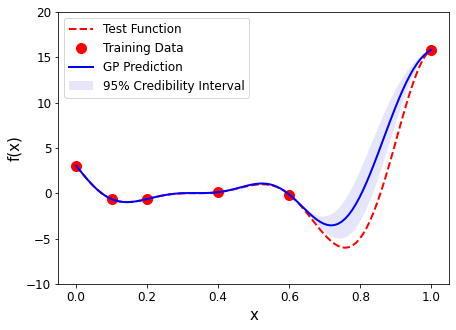

In [7]:
# Assess prediction results
fig, ax = plt.subplots(figsize=(7,5))
ax.plot(X_test,y_test,'r--',linewidth=2,label='Test Function')
ax.plot(X_train,y_train,'ro',markerfacecolor='r', markersize=10, label='Training Data')
ax.plot(X_test,y_pred,'b-', lw=2, label='GP Prediction')
ax.fill_between(X_test.flatten(), y_pred-1.96*np.sqrt(y_pred_SSqr), 
                y_pred+1.96*np.sqrt(y_pred_SSqr),
                facecolor='lavender',label='95% Credibility Interval')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('f(x)', fontsize=15)
ax.set_ylim([-10,20])
ax.legend(loc="upper left",prop={'size': 12});

## Test gradient calculation 

In [8]:
sample_num = X_test.shape[0]
problem_dim = X_test.shape[1]
theta = 10**GEGP.theta

In [15]:
n = 0
X_test_temp = np.tile(X_test[[n],:], (GEGP.X.shape[0], 1))
r = np.exp(-np.sum((GEGP.X-X_test_temp)**2*theta, axis=1, keepdims=True))

In [16]:
i = 0
a = 2*theta[i]*r*(GEGP.X[:,[i]]-X_test[n,i])

In [21]:
a

array([[0.00000000e+00],
       [3.20579792e+00],
       [3.57457261e+00],
       [6.90694597e-01],
       [2.10748205e-02],
       [1.35659324e-07]])

In [27]:
R_D_1st[:,0] = a.flatten()

In [28]:
R_D_1st

array([[0.00000000e+00],
       [3.20579792e+00],
       [3.57457261e+00],
       [6.90694597e-01],
       [2.10748205e-02],
       [1.35659324e-07]])

In [12]:
R_D_1st = np.zeros((GEGP.X.shape[0], problem_dim))
for i in range(problem_dim):
    R_D_1st[:,i] = 2*theta[i]*r*(GEGP.X[:,[i]]-X_test[n,i])

ValueError: could not broadcast input array from shape (6,1) into shape (6)

In [11]:
grad_cal = GEGP.predict_grad(X_test)

ValueError: could not broadcast input array from shape (6,1) into shape (6)